In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
import scipy.constants as scp
from tabulate import tabulate

---

# Kugelfallviskometer

In [3]:
#gemessene Zeiten:
t_9 = np.array([6.00, 6.01, 6.04, 5.93, 6.05])
t_8 = np.array([7.15, 7.34, 7.42, 7.28, 7.45])
t_7 = np.array([8.80, 9.36, 8.80, 8.81, 9.17])
t_6 = np.array([12.01, 12.43, 12.17, 12.20, 12.24])
t_5 = np.array([7.78, 7.59, 7.86, 7.59, 7.23])
t_4 = np.array([12.75, 12.46, 13.01, 13.01, 12.96])
t_3 = np.array([9.84, 10.15, 10.45, 10.14, 10.15])
t_2 = np.array([22.14, 24.84, 21.67, 24.04, 25.32])
t_1 = np.array([76.17, 74.76, 74.80, 70.37, 74.90])

#Mittelwerte:
t_m = np.empty(9)
j=0
for i in [t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9]:
    t_m[j] = np.mean(i)
    j +=1
    
dt_m = np.empty(9)
j=0
for i in [t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9]:
    dt_m[j] = np.sqrt(np.std(i)**2 + 0.2**2)
    j += 1

print(t_m)
print(dt_m)

print('---')

#Geschwindigkeiten:
s = np.array([50, 50, 50, 100, 100, 200, 200, 200, 200]) #mm
ds = np.full(9, 5.00)
v = s/t_m #mm/s
dv = v * np.sqrt((dt_m/t_m)**2 + (ds/s)**2)

print(v)
print(dv)

print('---')

#Kugelradien:
rad = np.arange(1, 10)/2 #mm
rad2 = rad**2 #mm^2

drad = np.full(9, 0.025/2)
drad2 = 2 * rad * drad

print(rad2)
print(drad2)

[74.2   23.602 10.146 12.838  7.61  12.21   8.988  7.328  6.006]
[1.9956653  1.46602046 0.27789207 0.29143781 0.29549958 0.24124676
 0.30785711 0.2269273  0.20441135]
---
[ 0.67385445  2.11846454  4.92805046  7.78937529 13.14060447 16.38001638
 22.25189141 27.29257642 33.3000333 ]
[0.06978016 0.24938728 0.51095531 0.42773132 0.83189496 0.52195062
 0.94359578 1.08621869 1.40625091]
---
[ 0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25]
[0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125]


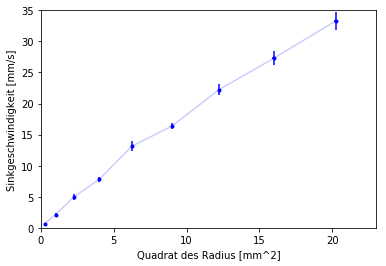

In [3]:
plt.errorbar(rad2, v, yerr=dv, xerr=drad2, fmt=".", color='blue')
plt.xlabel('Quadrat des Radius [mm^2]')
plt.ylabel('Sinkgeschwindigkeit [mm/s]')
plt.ylim((0,35))
plt.xlim((0,23))
plt.plot(rad2, v, color='blue', alpha=0.2)

In [4]:
# korrektur
R_rohr = 75/2 #mm

v_korr = np.empty(9) 
dv_korr = np.empty(9)
for i in range(0, 9):
    v_korr[i] = v[i] * (1 + 2.1 * rad[i]/R_rohr) #mm/s
    dv_korr[i] = np.sqrt((dv[i] * (1 + 2.1 * rad[i]/R_rohr))**2 + (v[i] * 2.1 * drad[i] /R_rohr)**2)

print(v_korr)
print(dv_korr)

[ 0.69272237  2.23709855  5.3420067   8.66178532 14.98028909 19.13185913
 26.61326213 33.40611354 41.69164169]
[0.07173556 0.26335714 0.55388629 0.47566847 0.94840486 0.60974615
 1.12864805 1.32966893 1.76078044]


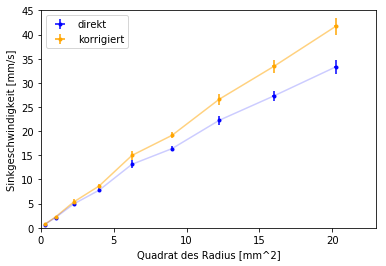

In [5]:
plt.errorbar(rad2, v, yerr=dv, xerr=drad2, fmt=".", color='blue', label='direkt')
plt.errorbar(x=rad2, y=v_korr, yerr=dv_korr, xerr=drad2, fmt=".", color='orange', label='korrigiert')
plt.xlabel('Quadrat des Radius [mm^2]')
plt.ylabel('Sinkgeschwindigkeit [mm/s]')
plt.ylim((0,45))
plt.xlim((0,23))
plt.legend()
plt.plot(rad2, v_korr, color='orange', alpha=0.5)
plt.plot(rad2, v, color='blue', alpha=0.2)
plt.savefig("./output/Geschwindigkeiten_korrektur.pdf", format="pdf")

In [6]:
#Fit gerade:
def lin(x, grad, b):
    return grad * x + b

#nur werte bis r=5mm:
rad2_cut = rad2[:5]
drad2_cut = drad2[:5]
v_korr_cut = v_korr[:5]
dv_korr_cut = dv_korr[:5]

print(rad2_cut)
print(drad2_cut)
print(v_korr_cut)
print(dv_korr_cut)

[0.25 1.   2.25 4.   6.25]
[0.0125 0.025  0.0375 0.05   0.0625]
[ 0.69272237  2.23709855  5.3420067   8.66178532 14.98028909]
[0.07173556 0.26335714 0.55388629 0.47566847 0.94840486]


Gradient= 2.227817515878292 , Standardfehler= 0.07464904226364695
Konst= 0.12716416574723532 , Standardfehler= 0.06345957066971265


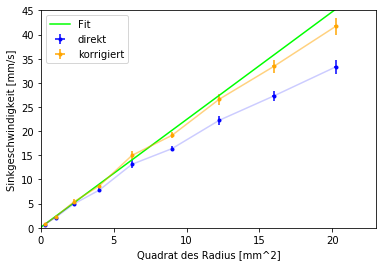

In [7]:
popt, pcov = curve_fit(lin, rad2_cut, v_korr_cut, sigma=dv_korr_cut)

grad = popt[0] #1/mm*s
dgrad = np.sqrt(pcov[0][0])

print("Gradient=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("Konst=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))

#Plot des Fits
plt.errorbar(rad2, v, yerr=dv, xerr=drad2, fmt=".", color='blue', label='direkt')
plt.errorbar(x=rad2, y=v_korr, yerr=dv_korr, xerr=drad2, fmt=".", color='orange', label='korrigiert')
plt.xlabel('Quadrat des Radius [mm^2]')
plt.ylabel('Sinkgeschwindigkeit [mm/s]')
plt.ylim((0,45))
plt.xlim((0,23))
x=np.linspace(0,23, 100)
plt.plot(x, lin(x,*popt), color='lime', label='Fit')
plt.legend()
plt.plot(rad2, v_korr, color='orange', alpha=0.5)
plt.plot(rad2, v, color='blue', alpha=0.2)
plt.savefig("./output/Fit_Stokes.pdf", format="pdf")

In [8]:
#rechne gradient in meter um: 
grad_ = grad * 1000 #1/m*s
dgrad_ = dgrad * 1000

In [9]:
rho_k = 1385 #kg/m^3
drho_k = 15 #kg/m^3

rho_f = 1147.1 #kg/m^3
drho_f = 0.3 #kg/m^3

diff_rho = rho_k - rho_f
ddiff_rho = np.sqrt(drho_k**2 + drho_f**2)

eta = 2/9 * scp.g * diff_rho/grad_ #Pa*s
deta = eta * np.sqrt((ddiff_rho/diff_rho)**2 + (dgrad_/grad_)**2)

print(eta, deta)

0.23271425642879717 0.016618915759214488


In [10]:
# Berechnung der Theoretischen Werte v_lam
v_lam = 2/9 * scp.g * diff_rho/eta * rad**2 * 10**(-6) #m/s
dv_lam = v_lam * np.sqrt((ddiff_rho/diff_rho)**2 + (deta/eta)**2 + (2 * drad/rad)**2)

#umrechnen in mm/s:
v_lam_mm = v_lam * 1000
dv_lam_mm = dv_lam * 1000

print(v_lam_mm)
print(dv_lam_mm)

[ 0.55695438  2.22781752  5.01258941  8.91127006 13.92385947 20.05035764
 27.29076457 35.64508025 45.1133047 ]
[0.05992627 0.21943698 0.48481765 0.85628128 1.33385783 1.91755495
 2.6073753  3.40332    4.30538959]


In [11]:
#Signifikanztest: v_lam und v_korr:
Sign_lk = np.empty(9)
for i in range(0, len(v_lam_mm)):
    Sign_lk[i] = np.abs(v_lam_mm[i] - v_korr[i])/np.sqrt((dv_lam_mm[i])**2 + (dv_korr[i])**2)

print(Sign_lk)

[1.45248793 0.02707446 0.44751911 0.25469853 0.64547988 0.4564728
 0.23845888 0.6127695  0.73559954]


In [12]:
#Reynolds-Zahl
Re = rho_f * v * 10**(-3) * rad * 2 * 10**(-3) /eta
dRe = Re * np.sqrt((drho_f/rho_f)**2 + (dv/v)**2 + (drad/rad)**2 + (deta/eta)**2)

print(Re)
print(dRe)

[0.00332158 0.02088476 0.07287435 0.15358221 0.32386472 0.48444432
 0.76779143 1.07624913 1.47728901]
[0.000426   0.00288742 0.00919476 0.01386869 0.03095026 0.03793755
 0.06382789 0.08805318 0.12263284]


In [13]:
#Verhältnis der Geschwindigkeiten v/v_lam
div_v = v/v_lam_mm
ddiv_v = div_v * np.sqrt((dv/v)**2 + (dv_lam_mm/v_lam_mm)**2)

print(div_v)
print(ddiv_v)

[1.20989164 0.95091475 0.98313468 0.87410383 0.94374728 0.81694385
 0.81536343 0.76567583 0.73814218]
[0.18067682 0.14595894 0.1394005  0.09673994 0.10836579 0.08235268
 0.08522869 0.07920215 0.07703317]


Re_krit = 0.7677914331635634
Differenz nach unten: 0.16057960687696798
Differenz nach oben: 0.2833471087497966


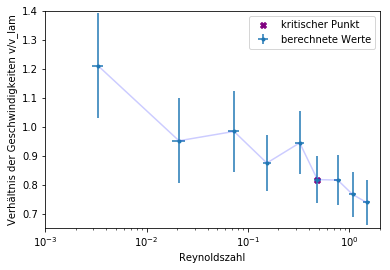

In [14]:
plt.errorbar(x=Re, y=div_v, yerr=ddiv_v, xerr=dRe, fmt='.', label='berechnete Werte')
plt.plot(Re, div_v, color='blue', alpha=0.2)
plt.xscale('log')
plt.ylim((0.65,1.4))
plt.xlim((0.001,2))
plt.ylabel('Verhältnis der Geschwindigkeiten v/v_lam')
plt.xlabel('Reynoldszahl')
plt.scatter(x=Re[5], y=div_v[5], color='purple', marker='X', linewidths=1.0, label='kritischer Punkt')
plt.legend()
plt.savefig("./output/Reynolds_Stokes.pdf", format="pdf")

print('Re_krit =', Re[6])
print('Differenz nach unten:', Re[5]-Re[4])
print('Differenz nach oben:', Re[6]-Re[5])

# Hagen-Poiseuille

Gradient= 3.262555315228818e-08 , Standardfehler= 5.574505427387909e-10
Konstante= 9.670970781378066e-07 , Standardfehler= 2.68466553565605e-07
---


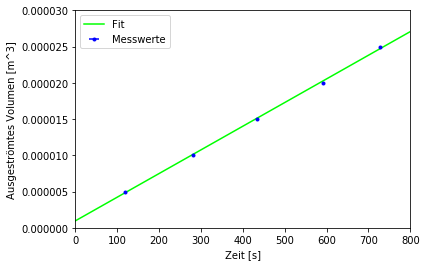

In [15]:
vol = np.array([5, 10, 15, 20, 25]) #ml=cm^3
time = np.array([118, 280, 433, 592, 727.6]) #s
dtime = np.full(5, 1.0)


#volumen in m^3
vol_m = vol * 10**(-6) 

#fit:
def lin2(x, a, b):
    return a * x + b

popt_V, pcov_V = curve_fit(lin2, time, vol_m) #, sigma=dtime

print("Gradient=",popt_V[0], ", Standardfehler=", np.sqrt(pcov_V[0][0]))
print("Konstante=",popt_V[1], ", Standardfehler=", np.sqrt(pcov_V[1][1]))

print('---')

#Plot des Fits
plt.errorbar(y=vol_m, x=time, xerr=dtime, fmt=".", color='blue', label='Messwerte')
plt.ylabel('Ausgeströmtes Volumen [m^3]')
plt.xlabel('Zeit [s]')
plt.xlim((0,800))
plt.ylim((0,30*10**(-6)))
x=np.linspace(0,800, 100)
plt.plot(x, lin2(x,*popt_V), color='lime', label='Fit')
plt.legend()
plt.savefig("./output/Fit_HP.pdf", format="pdf")

In [16]:
#Volumenstrom
dVdt = popt_V[0] #m^3/s
ddVdt = np.sqrt(pcov_V[0][0])

print(dVdt, ddVdt)

3.262555315228818e-08 5.574505427387909e-10


In [17]:
#Mittelwert der Höhe:
h_mean = 0.5 * (505.0+499.0) * 10**(-3) #m
dh_mean = 0.5 * 10**(-3) * np.sqrt(2)

#Druckdifferenz:
diff_p = rho_f * scp.g * h_mean #Pa
ddiff_p = diff_p * np.sqrt((drho_f/rho_f)**2 + (dh_mean/h_mean)**2)

#Kapillarlänge:
L = 100.0/1000 #m
dL = 0.5/1000

#Kapillarradius:
r = 1.5/2 * 10**(-3) #m
dr = 0.01/2 * 10**(-3)

#Viskosität
eta_HP = np.pi * diff_p * r**4 /(8 * L * dVdt)
deta_HP = eta_HP * np.sqrt((ddiff_p/diff_p)**2 + (ddVdt/dVdt)**2 + (dL/L)**2 + (4 * dr/r)**2)


print(h_mean)
print(dh_mean)

print('---')

print(diff_p)
print(ddiff_p)

print('---')

print(eta_HP)
print(deta_HP)

0.502
0.0007071067811865476
---
5647.10252393
8.090335077592052
---
0.21506648050319682
0.006902615002574234


In [18]:
#Signifikanztest:
abs(eta - eta_HP) / (np.sqrt(deta**2 + deta_HP**2))

0.9806825636906918

In [19]:
#mittlere Strömungsgeschwindigkeit:
v_kap = dVdt/(np.pi * r**2)
dv_kap = v_kap * np.sqrt((ddVdt/dVdt)**2 + (2 * dr/r)**2)

print(v_kap)
print(dv_kap)

0.018462286418823227
0.00040013359212906366


In [20]:
#Reynoldszahl:
Re_kap = 2 * rho_f * v_kap * r /eta_HP
dRe_kap = Re_kap * np.sqrt((drho_f/rho_f)**2 + (dr/r)**2 + (dv_kap/v_kap)**2 + (deta_HP/eta_HP)**2)

print(Re_kap)
print(dRe_kap)

0.14770843439768844
0.005804657096949721
